# Voxelize fibril point clouds 

## Imports & define paths & quick functions

In [1]:
# Imports
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from scipy.spatial.transform import Rotation as R
from tqdm import tqdm

# From script in same folder as notebook!
from custom_fibril_gen.custom_fibril_gen_parallel_v1 import *

In [2]:
# Define paths
notebookPath = pathlib.Path.cwd()
# RBDsPath = notebookPath.joinpath('blender_RBD_positions/RBD01_2.13umXY-0.1umZ-film_20nmXZ-100nmY-RBDs_300frames_0.1grav')
# RBDsPath = notebookPath.joinpath('blender_RBD_positions/RBD02_40x200nmFibrils_2200x2200x275nmBox')
# RBDsPath = notebookPath.joinpath('blender_RBD_positions/RBD03_20x100nmFibrils_2200x2200x136nmBox')
RBDsPath = notebookPath.joinpath('blender_RBD_positions/RBD04_20-30-40nmD_200nmL_2200x2200x138nmBox')
savePath = notebookPath.joinpath('open3d_outputs')

fibrilsPath = notebookPath.joinpath('custom_fibril_gen', f'fixed_fibrils')

In [3]:
# Define simple functions
def to_s0to1(value, min=-180, max=180):
    """Adjust a linear scale from min to max to fit between 0 and 1"""
    shift = 0 - min
    max = max + shift
    return (value + shift) / max

def from_s0to1(value, min=-180, max=180):
    """Inverse of 'to_s0to1': Adjust a linear scale 0 to 1 to an arbitrary linear scale between min and max"""
    shift = 0 + min
    max = max - shift
    return (value * max) + shift

## Use open3D to build and visualize a point cloud

### Load RBD coords & XYZ euler rotations

In [4]:
RBDs = sorted(RBDsPath.glob('*.txt'))
[f.name for f in RBDs]

['XYZrot_arr_v1.txt', 'size_arr_v1.txt', 'xyz_arr_v1.txt']

In [5]:
# RBD_coords = np.loadtxt(RBDs[-1]) * 10000 * 2  # convert um to Å, scale by factor of 2 in this case
RBD_XYZrots = np.loadtxt(RBDs[0])
RBD_sizes = np.round(np.loadtxt(RBDs[1]), 2)
RBD_coords = np.loadtxt(RBDs[2]) * 10000  # convert um to Å

In [6]:
RBD_sizes[RBD_sizes[:,0]==0.02].shape

(1530, 3)

In [7]:
np.unique(RBD_sizes)

array([0.02, 0.03, 0.04, 0.2 ])

In [8]:
RBD_XYZrots.shape

(3629, 3)

### Generate & save a fibril folder for each RBD 

In [ ]:
# Diameter distribution
targ_diam = 145  # diameter around which to pick a normal distribution in angstroms
sigma = 1  # standard deviation about diameter above

# Generate random distribution of diameters
rng = np.random.default_rng()
diams = rng.normal(loc=targ_diam, scale=sigma, size=100)
diams = np.round(diams, 2)

# Quick histogram check of distribution
plt.hist(diams, bins=10)
plt.show()

In [ ]:
savepath

In [ ]:
fibrilsPath = notebookPath.joinpath('custom_fibril_gen', f'fixed_fibrils')

expPath = notebookPath.joinpath('custom_fibril_gen', 'PM6_CF_sol636_buf635_emp614.txt')

In [ ]:
1/(21.5**3)

In [ ]:
1/(10**3)

In [ ]:
fibrilsPath

In [ ]:
# Generate fibril folders:
# fibrilsPath = notebookPath.joinpath('custom_fibril_gen', 'fibril_distributions', f'RBD04_diam{targ_diam}sigma{sigma}_v1')
fibrilsPath = notebookPath.joinpath('custom_fibril_gen', f'fixed_fibrils')

expPath = notebookPath.joinpath('custom_fibril_gen', 'PM6_CF_sol636_buf635_emp614.txt')

savepath = str(fibrilsPath)
exp_path = str(expPath)

num_fibrils = 1
length = 2000
flex = 1e-4
# e_dense = 0.0001  # 1 electron per 21.5x21.5x21.5 Å box -> 0.0001006
e_dense = 0.001  # 1 electron per 10**3 box
fuzz_length = 0
fuzz_density = 0
q_norm_idx = 9

flexes_dict = {0.05:'0p05', 0.01:'0p01',0.005:'0p005', 0.001:'0p001', 0.0001:'0p0001'}
dens_dict = {0.0001:'0p0001', 0.01:'0p01', 0.001:'0p001'}
# for i, diam in enumerate(tqdm(diams)):
#     for flex in flexes:
#         flex_label = flexes_dict[flex]
#         dens_label = dens_dict[e_dense]
#         test_fibril_scattering_par(
#             num_fibrils,length,diam,flex,e_dense,exp_path,
#             savepath + f'/dtotal{diam}_length{length}_flex{flex_label}_edens{dens_label}_idx{i}/'
#             )

diams = [200, 300, 400]
for i, diam in enumerate(tqdm(diams)):
    flex_label = flexes_dict[flex]
    dens_label = dens_dict[e_dense]
    test_fibril_scattering_par(
        num_fibrils, length, diam, flex, e_dense, fuzz_density, fuzz_length, q_norm_idx, exp_path,
        savepath + f'/dtotal{diam}_length{length}_flex{flex_label}_edense{dens_label}_idx{i}/'
        )

In [ ]:
# def sq_vec(pos,qs):
#     '''
#     Calculates the scattering profile using the debye equation. 

#     Input
#       pos = scatterer positions in 3D cartesian coordinates (nx3 array)
#       qs = list of q values to evaluate scattering intensity at
#     '''
#     ### initialize sq array for same length of q-range
#     nbins = len(qs)
#     sq = np.zeros((nbins))
#     ### number of atoms in fibril to be simulated
#     natoms = len(pos)
#     ### calculate contribution to scattering for each pair of atom
#     for i in tqdm(range(natoms)):
#         ### find displacements from current points to all subsequent points
#         ### prevents double counting of displacements
#         all_disp = pos[i,:]-pos[(i+1):,:]
        
#         ### calculate the distance from displacement vector ###
#         rij = np.sqrt(np.sum(np.square(all_disp),axis=1))

#         #create array of q vectors and radiuses
#         qi = qs[np.newaxis,:]
#         R = rij[:,np.newaxis]
#         ### add scattering intensity contribution for given pair of atoms
#         increment = np.sum(ne.evaluate("2*sin(R*qi)/(R*qi)"),axis=0)
#         print(increment.shape)
#         sq = sq+increment

#     return sq

In [ ]:
# pos = np.load(fibrilsPath.joinpath('dtotal188.63_length1000_flex0p01_idx1/flex_cylinder_num0.npy'))
# qs = np.loadtxt(expPath)[:,0]
# ints = sq_vec(pos, qs)
# ints

In [ ]:
# plt.loglog(qs, ints)
# plt.show()

### Build full point cloud with a single selected fibril

In [9]:
fibrilsPath

PosixPath('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/morph_gen/custom_fibril_gen/fixed_fibrils')

In [10]:
fibril_paths = sorted(fibrilsPath.glob('dtotal*'))
for i, fibril_path in enumerate(fibril_paths):
    print(i, fibril_path.name)

0 dtotal200_length2000_flex0p0001_edense0p001_idx0
1 dtotal200_length2000_flex0p0001_edense0p1_idx0
2 dtotal200_length2000_flex0p0001_idx0
3 dtotal200_length500_flex0p0001_idx0
4 dtotal300_length2000_flex0p0001_idx1
5 dtotal400_length2000_flex0p0001_idx2


In [11]:
RBD_sizes[:2][0][0] == 0.04

True

In [12]:
# fibrilPath = notebookPath.joinpath('fibrils_for_andrew/nofuzz_fibril_oct23/dtotal400_length2000_flex0p0001_edens0p0001')
# fibril_npys = sorted(fibrilPath.glob('*.npy'))
# [f.name for f in fibril_npys]

In [13]:
def load_fibril(fibril_path, skip_step=1, shift=True):

    fibril_npys = sorted(fibril_path.glob('*.npy'))
    
    # Load individual fibril (for now just placing this one everywhere... will be in loop when generating for each box)
    backbone_axs = np.load(fibril_npys[0])
    backbone_coords = np.load(fibril_npys[1])
    backbone_css = np.load(fibril_npys[2])
    fibril_points_arr = np.load(fibril_npys[3])[::skip_step]  

    if shift==True:
        # Shift along z so that its midpoint is at the origin
        zshift = np.zeros_like(fibril_points_arr)
        zshift[:,2] = backbone_coords[:,2].max() / 2
        fibril_points_arr = fibril_points_arr - zshift

    return backbone_axs, backbone_coords, backbone_css, fibril_points_arr

In [14]:
selected_fibrils = np.array(fibril_paths)[[0, 2, 3]]
for i, fibril_path in enumerate(selected_fibrils):
    print(i, fibril_path.name)

0 dtotal200_length2000_flex0p0001_edense0p001_idx0
1 dtotal200_length2000_flex0p0001_idx0
2 dtotal200_length500_flex0p0001_idx0


In [15]:
selected_fibrils = np.array(fibril_paths)[[0]]
for i, fibril_path in enumerate(selected_fibrils):
    print(i, fibril_path.name)

0 dtotal200_length2000_flex0p0001_edense0p001_idx0


In [24]:
RBD_XYZrot

array([  73.01349962,   17.64891682, -154.66841798])

In [43]:
backbone_coords.shape

(2000, 3)

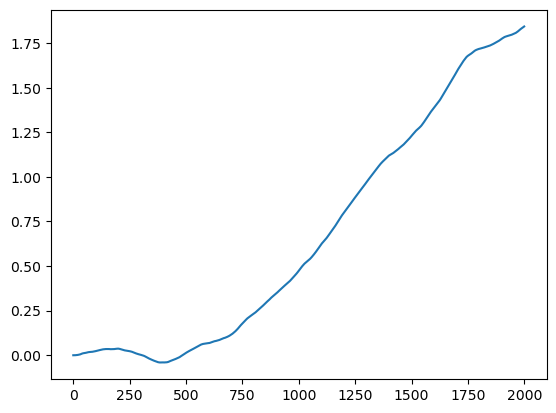

In [44]:
plt.plot(backbone_coords[:,0])

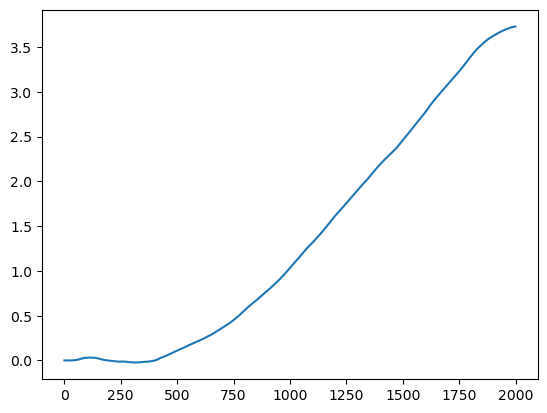

In [45]:
plt.plot(backbone_coords[:,1])

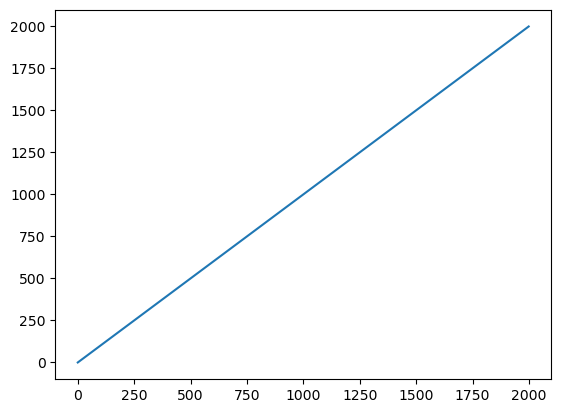

In [46]:
plt.plot(backbone_coords[:,2])

In [55]:
# Add coordinates for each box, add to point cloud mesh immediately
pc = o3d.geometry.PointCloud()

# Load RBD coords & XYZ euler rotations, specify how many boxes to fill
RBD_XYZrots = np.loadtxt(RBDs[0])
RBD_sizes = np.round(np.loadtxt(RBDs[1]), 2)
RBD_coords = np.loadtxt(RBDs[2]) * 10000  # convert um to Å

boxes_to_fill = 1  # -1 is all films
for RBD_XYZrot, RBD_coord, RBD_size in tqdm(zip(RBD_XYZrots[:boxes_to_fill], RBD_coords[:boxes_to_fill], RBD_sizes[:boxes_to_fill]), total=len(RBD_XYZrots[:boxes_to_fill])):
    # Load correct fibril:
    if RBD_size[0]==0.02:
        backbone_axs, backbone_coords, backbone_css, fibril_points_arr = load_fibril(selected_fibrils[0], skip_step=1)
        print('20nm')
    elif RBD_size[0]==0.03:
        backbone_axs, backbone_coords, backbone_css, fibril_points_arr = load_fibril(selected_fibrils[0], skip_step=1)
        print('30nm')
    elif RBD_size[0]==0.04:
        backbone_axs, backbone_coords, backbone_css, fibril_points_arr = load_fibril(selected_fibrils[0], skip_step=1)
        print('40nm')
    else:
        print('no matchin fibrils to load')
        break
    
    # Apply euler rotation to each fibril and backbone axial pointers
    # Apply pre rotation correction if necessary
    r_pre_rotation = R.from_euler('y', 0, degrees=True)
    pre_rotated_fibril = r_pre_rotation.apply(fibril_points_arr)
    pre_rotated_bb_axs = r_pre_rotation.apply(backbone_axs)
    pre_rotated_bb_coords = r_pre_rotation.apply(backbone_coords)
    # Rotate corrected fibril orientation
    # r_RBD = R.from_euler("xyz", RBD_XYZrot, degrees=True)
    r_RBD = R.from_euler("xyz", [0,0,0], degrees=True)

    rotated_fibril = r_RBD.apply(pre_rotated_fibril)
    rotated_backbone_axs = r_RBD.apply(pre_rotated_bb_axs)
    rotated_backbone_coords = r_RBD.apply(pre_rotated_bb_coords)
    
    # # Convert rotated backbone points to 2 Euler angles; PARALLEL to backbone (select backbone axial pointer)
    # phi = np.rad2deg(np.arctan2(rotated_backbone_axs[:,0], rotated_backbone_axs[:,1]))
    # theta = np.rad2deg(np.arccos(rotated_backbone_axs[:,2]))
    # euler_ZY_rot = np.vstack((phi,theta)).T
    # # Assign euler angle to each fibril point by its nearest backbone point:
    # fibril_ZYrots = np.empty((0,2))
    # for fibril_point in fibril_points_arr[:]:
    #     backbone_displacements = backbone_coords - fibril_point
    #     backbone_distances = np.sqrt(backbone_displacements[:,0]**2 + backbone_displacements[:,1]**2 + backbone_displacements[:,2]**2)
    #     backbone_minimum_index = (backbone_distances == backbone_distances.min()).nonzero()[0][0]
    
    #     fibril_ZYrots = np.append(fibril_ZYrots, euler_ZY_rot[backbone_minimum_index].reshape(1,2), axis=0)
        
    # Convert rotated backbone points to 2 Euler angles; PERPENDICULAR to backbone (extract euler angle for shortest pointer to backbone)
    fibril_ZYrots = np.empty((0,2))
    for fibril_point, rot_fibril_point in zip(fibril_points_arr, rotated_fibril):
        
        backbone_z_displacements = rotated_backbone_coords[:,2] - fibril_point[2]
        backbone_minimum_index = (backbone_z_displacements == backbone_z_displacements.min()).nonzero()[0][0]
    # for fibril_point in rotated_fibril[:]:
    #     backbone_displacements = rotated_backbone_coords - fibril_point
    #     backbone_distances = np.sqrt(backbone_displacements[:,0]**2 + backbone_displacements[:,1]**2 + backbone_displacements[:,2]**2)
    #     backbone_minimum_index = (backbone_distances == backbone_distances.min()).nonzero()[0][0]
        
        backbone_displacements = rotated_backbone_coords - rot_fibril_point
        shortest_displacement = backbone_displacements[backbone_minimum_index]
        mag = np.sqrt(shortest_displacement[0]**2+shortest_displacement[1]**2+shortest_displacement[2]**2)
        shortest_displacement = shortest_displacement / mag  # make a unit vector
        print(shortest_displacement)
        phi = np.rad2deg(np.arctan2(shortest_displacement[0], shortest_displacement[1]))
        theta = np.rad2deg(np.arccos(shortest_displacement[2]))
        euler_ZY_rot = np.vstack((phi,theta)).T
    
        fibril_ZYrots = np.append(fibril_ZYrots, euler_ZY_rot, axis=0)
    
    # Encode Euler angles into RGB values (set B=1, represent S)`
    fibril_RGB_values = np.array([to_s0to1(fibril_ZYrots[:,0], min=-180, max=180),  # psi
                                  to_s0to1(fibril_ZYrots[:,1], min=0, max=180),  # theta
                                  np.ones((fibril_ZYrots[:,0].shape))]).T  # S (ones)
    
    # Move fibril coordinates to RBD location
    # moved_fibril = (rotated_fibril + RBD_coord) / 2  # divide by 2 just for now to undo scaling from before
    moved_fibril = (rotated_fibril + RBD_coord)  
    # moved_fibril = (fibril_points_arr + RBD_coord)  
    
    # Add points and colors to point cloud
    pc.points.extend(moved_fibril)
    pc.colors.extend(fibril_RGB_values)

  0%|                                                                              | 0/1 [00:00<?, ?it/s]

40nm
[ 0.11842883 -0.08594366  0.98923622]
[ 0.3552886 -0.0559234 -0.9330823]
[0.19135958 0.22866577 0.95451217]
[-0.0347898  -0.03918771 -0.99862605]
[ 0.63722155 -0.6159329  -0.46322279]
[-0.02023388  0.0434359  -0.9988513 ]
[ 0.05010049  0.0943618  -0.99427652]
[ 0.12256229 -0.31819577 -0.94006911]
[0.06183564 0.08041521 0.99484157]
[ 0.11024155  0.04990297 -0.99265125]
[-0.08249617  0.05886685  0.99485128]
[ 0.06837629  0.06484494 -0.99555001]
[0.05765694 0.20882532 0.97625184]
[-0.03194157 -0.09374184  0.99508402]
[-0.10147063  0.18095182  0.9782434 ]
[-0.03384395  0.01885521 -0.99924925]
[-0.09304859 -0.23220659 -0.96820559]
[0.09248726 0.06288563 0.99372607]
[0.01143804 0.00156297 0.99993336]
[ 0.04512528 -0.0936401   0.99458295]
[-0.10014824  0.03424122  0.99438316]
[0.07743858 0.14944288 0.98573328]
[ 0.04512579 -0.61481291  0.78738095]
[ 0.3150583  -0.03618369 -0.94838231]
[ 0.07299574 -0.06302316  0.99533899]
[-0.12196515 -0.01224146 -0.99245889]
[-0.02535543  0.25057415 -0.

100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.18s/it]

[-0.06116892  0.22655231 -0.97207634]
[-0.06083594  0.02823608 -0.99774832]
[-0.26927221 -0.00177533 -0.96306247]
[-0.25901858 -0.2720917   0.92675535]
[0.73839095 0.30769554 0.60008521]
[-0.09344808 -0.14888797  0.98442868]
[ 0.18759935 -0.3481508  -0.91847564]
[0.09003638 0.0416566  0.99506692]
[-0.51370344  0.77510776 -0.36785422]
[-0.01973526 -0.03482073 -0.9991987 ]
[-0.3784931   0.10879571 -0.91918794]
[ 0.07147142 -0.12448331  0.98964425]
[0.50421114 0.65464059 0.56322005]
[ 0.03436412 -0.17382531  0.98417675]
[-0.35689775  0.71619481 -0.59974077]
[ 0.00829743  0.1015756  -0.99479322]
[0.21631548 0.15292573 0.96427244]
[0.01658826 0.20887744 0.97780113]
[-0.04842894  0.01869582  0.99865164]
[0.55250237 0.53272813 0.64104748]
[-0.08695175  0.07158715  0.99363709]
[0.05540406 0.17140007 0.98364242]
[ 0.02973656  0.12434267 -0.99179365]
[ 0.06517967 -0.22856092  0.97134521]
[ 0.10773353 -0.06488943  0.9920599 ]
[ 0.04475647  0.0336524  -0.99843096]
[ 0.11468482  0.08866855 -0.98943

In [52]:
shortest_displacement

array([-0.13727435, -0.31183885, -0.94016609])

In [30]:
np.sqrt(shortest_displacement[0]**2+shortest_displacement[1]**2+shortest_displacement[2]**2)

226.04833769448746

In [53]:
pc

PointCloud with 62800 points.

In [39]:
# o3d.visualization.draw_geometries([pc])

In [54]:
o3d.visualization.EV.set(pc)

True

In [ ]:
# o3d.io.write_point_cloud('testing.ply', pc)

## Use open3D to voxelize point cloud

In [ ]:
# np.asarray(pc.points).max() / 1024

In [ ]:
1024*1024*128

In [18]:
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pc, voxel_size=10)
voxel_grid

VoxelGrid with 40432 voxels.

In [ ]:
# visualize, will need to restart kernel after :O
o3d.visualization.draw_geometries([voxel_grid])

### Save open3d voxel grid as binary .ply file

In [19]:
savePath

PosixPath('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/morph_gen/open3d_outputs')

In [ ]:
# scenarios: 
# - a: extraordinary parallel to fibril long axis
# - b: extraordinary perpendicular, radially pointing to long fibril long axis
# - c: extraordinary perpendicular, radial distribution around long fibril long axis
# - d: extraordinary perpendicular, always full in-plane (edge on for π* manifold) 
# - e: extraordinary perpendicular, always out-of-plane (as much as possible given fibril long axis)
# - f: extraordinary askew, totally random orientations 
# - g: extraordinary askew, always out-of-plane (irrespective of fibril long axis)
# - h: extraordinary askew, distribution (irrespective of fibril long axis)

In [20]:
o3d.io.write_voxel_grid(str(savePath.joinpath('RBD04-index1_voxelgrid_scenario-a_v1.ply')), voxel_grid)


True

In [ ]:
# o3d.io.write_voxel_grid(str(savePath.joinpath('RBD01_perp2bb_voxel_grid_v2.ply')), voxel_grid)
# o3d.io.write_voxel_grid(str(savePath.joinpath('RBD03_perp2bb_voxel_grid_v1.ply')), voxel_grid)

# o3d.io.write_voxel_grid(str(savePath.joinpath('RBD04_voxelgrid_perp2bb_fixedfibrils_v1.ply')), voxel_grid)

# o3d.io.write_voxel_grid(str(savePath.joinpath('RBD02_para2bb_voxel_grid_v1.ply')), voxel_grid)
# o3d.io.write_voxel_grid(str(savePath.joinpath('RBD02_perp2bb_voxel_grid_v1.ply')), voxel_grid)

In [ ]:
# Load saved file & check contents

loaded_voxel_grid = o3d.io.read_voxel_grid(str(savePath.joinpath('RBD03_perp2bb_voxel_grid_v1.ply')))
loaded_voxel_grid

In [ ]:
# Load saved file & check contents

loaded_voxel_grid = o3d.io.read_voxel_grid(str(savePath.joinpath('RBD03_para2bb_voxel_grid_v1.ply')))
loaded_voxel_grid

In [ ]:
# Convert voxel grid to list of voxels, with grid index & color

voxels = voxel_grid.get_voxels()  # returns list of voxels
# indices = np.stack(list(vx.grid_index for vx in voxels))
# colors = np.stack(list(vx.color for vx in voxels))

voxels